In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input,Layer,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [2]:
class customDense(Layer):
  def __init__(self,units = 32,activation = None):
    super(customDense,self).__init__()
    self.units = units
    self.activation = tf.keras.activations.get(activation)
  
  def build(self, inputShape):
    weightInitializer = tf.random_normal_initializer()
    self.w = tf.Variable(
        initial_value = weightInitializer(shape=(inputShape[-1],self.units),dtype='float32'),
        trainable = True
        )
    biasInitializer = tf.zeros_initializer()
    self.b = tf.Variable(
        initial_value=biasInitializer(shape=(self.units),dtype='float32'),
        trainable = True
        )
    super().build(inputShape)

  def call(self,x):
    return self.activation(tf.linalg.matmul(x,self.w) + self.b)


In [3]:
xtr = np.array([ 0, 1, 2, 3, 5, 6, 9, 8 ])
ytr = np.array([ 1, 3, 5, 7, 11, 13, 19, 17])

def getModel():
  input = Input(shape=(1,))
  x = input
  x = customDense(1,activation='relu')(x)
  model = Model(inputs = input, outputs = x)
  return model

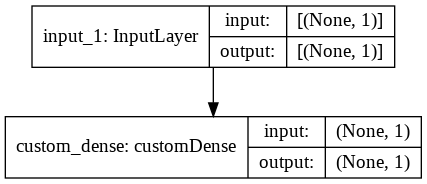

In [4]:
model = getModel()
model.compile(optimizer='sgd', loss = 'mse')
plot_model(model,show_shapes=True)

In [5]:
history = model.fit( x = xtr, y = ytr, epochs=500,verbose = 0)

In [6]:
# expected value : 21
model.predict([10])

array([[21.013317]], dtype=float32)

In [7]:
model.layers[1].weights

[<tf.Variable 'custom_dense/Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.0036907]], dtype=float32)>,
 <tf.Variable 'custom_dense/Variable:0' shape=(1,) dtype=float32, numpy=array([0.97640973], dtype=float32)>]

In [8]:
# ax^2 + bx + c
a = 1
b = 2
c = 1
xtr = np.random.choice(20, 5)
ytr = []
for x in xtr:
  ytr.append(a * x * x + b * x + c)
ytr = np.array(ytr)

In [9]:
class polynomialDense(Layer):
  def __init__(self,units = 32,activation = None):
    super(polynomialDense,self).__init__()
    self.units = units
    self.activation = tf.keras.activations.get(activation)
  
  def build(self, inputShape):
    weightInitializer = tf.random_normal_initializer()
    self.w1 = tf.Variable(
                initial_value = weightInitializer(shape=(inputShape[-1],self.units),dtype='float32'),
                trainable = True
            )
    self.w2 = tf.Variable(
                initial_value = weightInitializer(shape=(inputShape[-1],self.units),dtype='float32'),
                trainable = True
            )
    biasInitializer = tf.zeros_initializer()
    self.b = tf.Variable(
          initial_value=biasInitializer(shape=(self.units),dtype='float32'),
          trainable = True
        )

  def call(self,x):
    return self.activation(tf.linalg.matmul( tf.math.pow(x,2),self.w1) + tf.linalg.matmul(x ,self.w2) + self.b)

In [10]:
def getModelPoly():
  input = Input(shape=(1,))
  x = polynomialDense(units = 1,activation='relu')(input)
  model = Model(inputs = input, outputs = x)
  return model

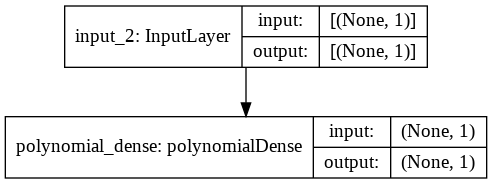

In [11]:
model = getModelPoly()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.00001), loss = 'mse')
history = model.fit(x = xtr, y = ytr, epochs=2500,verbose = 0)
plot_model(model, show_shapes=True)

In [12]:
# expected value : 676
model.predict([25])

array([[691.74835]], dtype=float32)

In [13]:
model.layers[1].weights

[<tf.Variable 'polynomial_dense/Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.0830088]], dtype=float32)>,
 <tf.Variable 'polynomial_dense/Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.589213]], dtype=float32)>,
 <tf.Variable 'polynomial_dense/Variable:0' shape=(1,) dtype=float32, numpy=array([0.13752462], dtype=float32)>]